In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 13, 9


Text(0.5, 0, 'Годы карьеры в NBA')

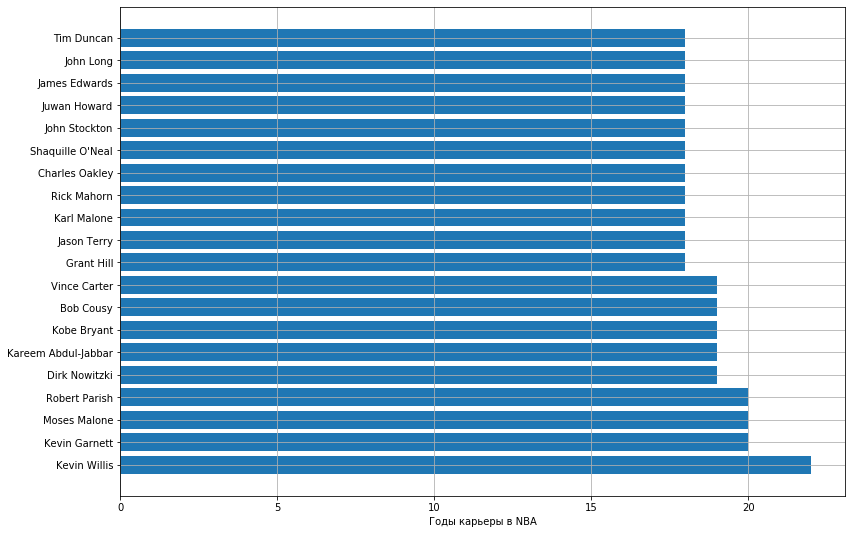

In [2]:
# 20 игроков, которые дольше всех играли в NBA

players = pd.read_csv('player_data.csv')
players['career'] = (players['year_end'] - players['year_start'])
players_bh = players[['name', 'career']]
players_bh = players_bh.sort_values('career', ascending=False).head(20)
plt.barh(players_bh['name'], players_bh['career'])
plt.grid()
plt.xlabel('Годы карьеры в NBA')

Text(0.5, 1320, 'Количество игроков, играющих в NBA менее года')

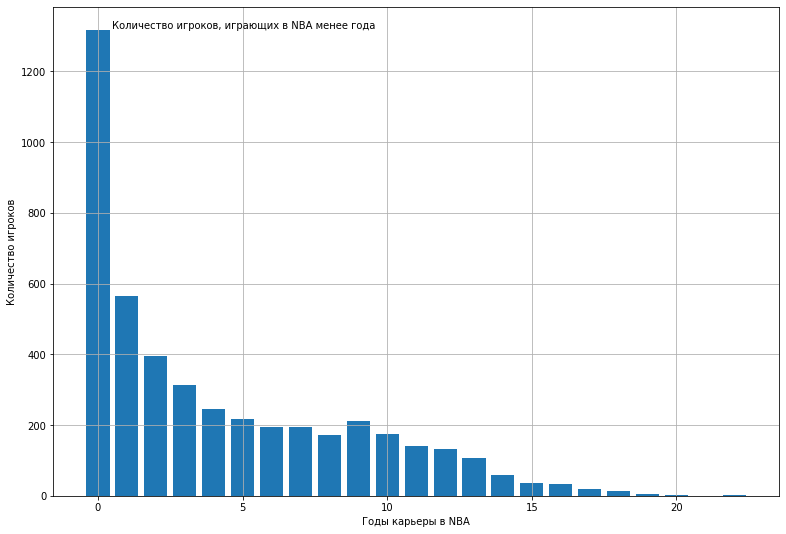

In [3]:
# количество игроков по годам карьеры в NBA (Срок "службы" игроков в NBA). Около трети игроков играли в NBA меньше года. 
# Игроков, игравших 9 лет в NBA, больше, чем игроков, игравших 8 лет

players = pd.read_csv('player_data.csv')
players['career'] = (players['year_end'] - players['year_start'])
players_b = players[['name', 'career']]
players_b = players_b.groupby('career').count()
players_b = players_b.rename(columns={'name' : 'count'})

plt.bar(players_b.index, players_b['count'])
plt.grid()
plt.ylabel('Количество игроков')
plt.xlabel('Годы карьеры в NBA')
plt.text(0.5, 1320, 'Количество игроков, играющих в NBA менее года')

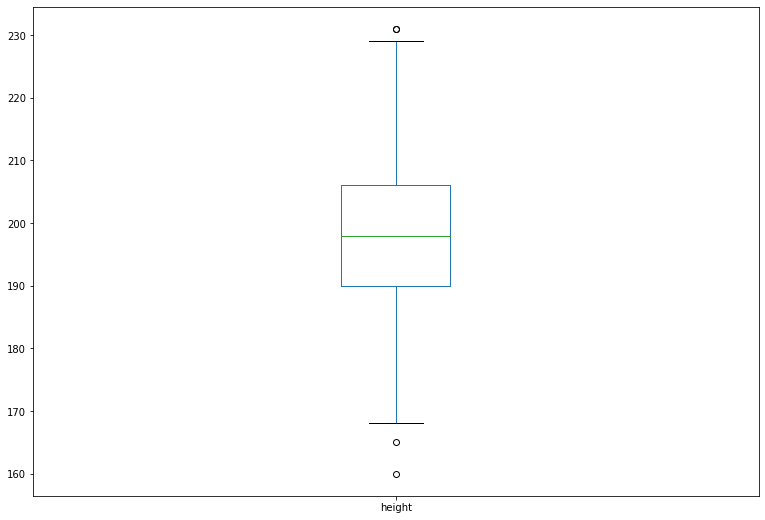

In [4]:
# анализ роста игроков NBA. В основном рост спортсменов от 190 до 205 см. В истории есть игроки ростом выше 230 см и ниже 160 см

play = pd.read_csv('players.csv')
play.head()
play['height'].plot(kind='box')

In [5]:
play1 = pd.read_csv('players.csv')
play1 = play1.dropna()
play1['born'] = play1.born.astype('int64')
play1.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky
6,6,Charlie Black,196.0,90.0,University of Kansas,1921,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927,New Brunswick,New Jersey


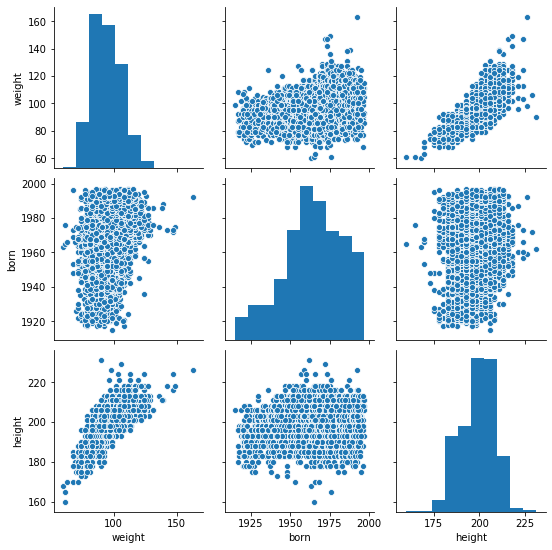

In [6]:
# попробуем найти зависимость между годом рождения / весом / ростом спортсменов
play_plot = sns.pairplot(
    play1[['weight', 'born', 'height']])
play_plot

In [ ]:
Выводы: 1. до 1950 года в NBA не было спортсменов выше 220 см.
    2. Практически прямая зависимость веса от роста (за некоторыми исключениями (вес порядка 80 кг при росте выше 230 см))
    3. Начиная с 1950-х годов рост спортсменов практически не меняется, при этом с 1970-х вес спортсменов увеличивается. 
    Возможно это связано с развитием индустрии спортивного питания и спортивной фармакологии.
    4. В целом со временем средний рост и вес спортсменов в NBA постепенно увеличивается.

In [7]:
# топ-20 штатов - основных "поставщиков" игроков в NBA
play2 = play1.groupby('birth_state')[['Player']].count().sort_values('Player', ascending=False).head(20)  
play2.style.bar()

,Player
birth_state,
California,337
New York,286
Illinois,203
Pennsylvania,162
Ohio,136
Michigan,131
Texas,127
Georgia,113
Louisiana,101
